In [2]:
import pandas as p
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os

In [2]:
data=p.read_csv('ftp://sidads.colorado.edu/pub/DATASETS/NOAA/G01130/wgi_feb2012.csv',encoding = 'ANSI')

In [3]:
data

,wgi_glacier_id,political_unit,continent_code,drainage_code,free_position_code,local_glacier_code,glacier_name,lat,lon,easting,...,area_exp,mean_width,mean_length,max_length,max_length_exp,max_length_abl,orientation_acc,orientation_abl,data_contributor,remarks
0,AF5Q112B0009,AF,5,Q112,B0,009,NaN,34.807,68.891,NaN,...,NaN,NaN,NaN,1.5,NaN,NaN,N,NW,"Cogley 2008 from WGMS and NSIDC (1989, updated...",NaN
1,AF5Q112C0025,AF,5,Q112,C0,025,NaN,35.438,69.552,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,S,S,"Cogley 2008 from WGMS and NSIDC (1989, updated...",NaN
2,AF5Q112C0085,AF,5,Q112,C0,085,NaN,35.869,70.224,NaN,...,NaN,NaN,NaN,1.9,NaN,NaN,SW,W,"Cogley 2008 from WGMS and NSIDC (1989, updated...",NaN
3,AF5Q112C0146,AF,5,Q112,C0,146,NaN,35.458,70.023,NaN,...,NaN,NaN,NaN,0.9,NaN,NaN,NW,NW,"Cogley 2008 from WGMS and NSIDC (1989, updated...",NaN
4,AF5Q112C0151,AF,5,Q112,C0,151,NaN,35.409,69.959,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,N,NE,"Cogley 2008 from WGMS and NSIDC (1989, updated...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132885,US2M00B26007,US,2,M00B,26,007,NaN,47.800,-123.583,NaN,...,NaN,NaN,NaN,0.6,NaN,NaN,E,NaN,"Cogley 2008 from WGMS and NSIDC (1989, updated...",NaN
132886,US2M00B27010,US,2,M00B,27,010,NaN,47.883,-123.600,NaN,...,NaN,NaN,NaN,0.2,NaN,NaN,SE,NaN,"Cogley 2008 from WGMS and NSIDC (1989, updated...",NaN
132887,US2M10422013,US,2,M104,22,013,NaN,47.483,-120.900,NaN,...,NaN,NaN,NaN,0.5,NaN,NaN,N,NaN,"Cogley 2008 from WGMS and NSIDC (1989, updated...",NaN
132888,US2M10446011,US,2,M104,46,011,DAVENPORT,48.483,-121.033,NaN,...,NaN,NaN,NaN,0.7,NaN,NaN,SE,NaN,"Cogley 2008 from WGMS and NSIDC (1989, updated...",NaN


# Markdown Fun (Task 1)

---
## Details of Glaciers in world

* **Count:**

In [4]:
data["wgi_glacier_id"].count()

132890

* *Mean by Continent Code*

In [5]:
data.groupby('continent_code').wgi_glacier_id.count().reset_index()

,continent_code,wgi_glacier_id
0,1,9347
1,2,24689
2,3,59
3,4,12889
4,5,81245
5,6,3704
6,7,957


---

# Calling method Chain (Task 3)
---

In [1]:
# import and clean up data
from scripts import project_functions as  pf
data = pf.Procces('ftp://sidads.colorado.edu/pub/DATASETS/NOAA/G01130/wgi_feb2012.csv')

In [3]:

os.chdir("..")
os.chdir("..")
os.chdir("data/processed")
path = os.getcwd()
print(path)
data.to_csv(path + '\processed.csv')

C:\Users\Garrett\Documents\GitHub\course-project-solo_101\data\processed


# EDA (Task 4)

In [ ]:
data_1 = data.groupby('Country').mean_elev.mean().reset_index()
data_1

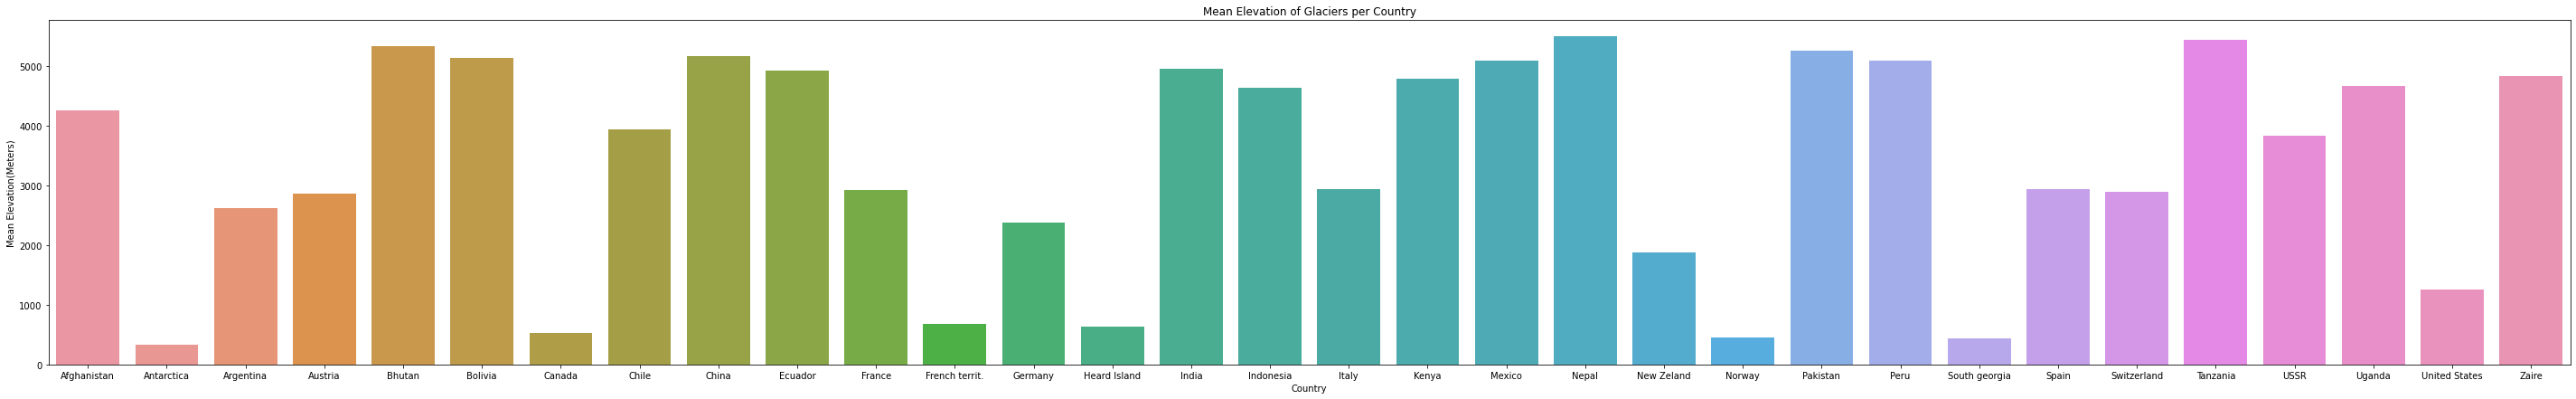

In [8]:
# Mean elevation of glaciers per country
plt.figure(figsize=(50, 7))
sns.barplot(x=data_1['Country'],y=data_1['mean_elev'])
plt.ylabel('Mean Elevation(Meters)')
plt.title('Mean Elevation of Glaciers per Country')
plt.show()

Notes: Interesting how large percentage of glaciers are at very high elevation with few exceptions

<AxesSubplot:xlabel='mean_elev', ylabel='Country'>

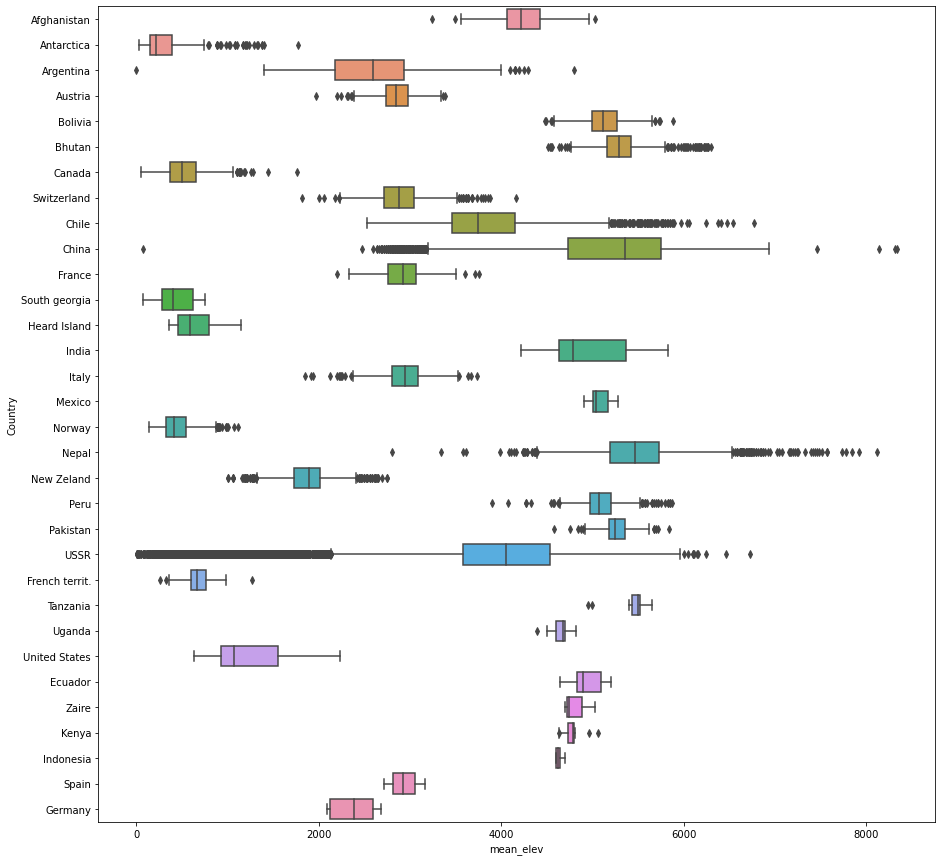

In [9]:
# Mean elevation of glaciers per country
plt.figure(figsize=(15, 15))
sns.boxplot(data=data,x=data['mean_elev'],y=data['Country'])

Notes: Most countries are either at one extreme or another nothing is really in the middle

<Figure size 1080x1080 with 0 Axes>

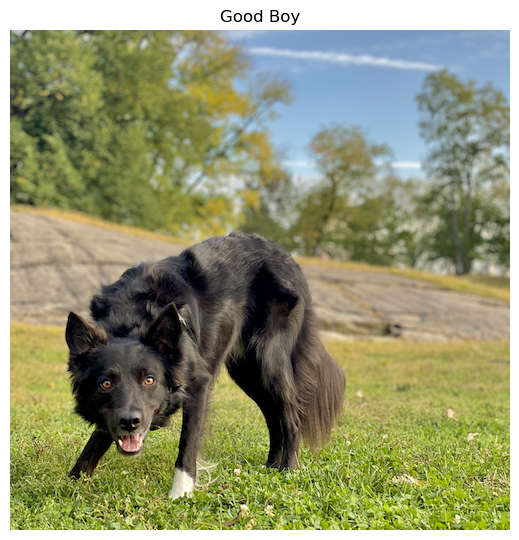

In [27]:
# Dog
plt.figure(figsize=(15, 15))
sns.dogplot()
plt.title('Good Boy')
plt.show()

Notes: Doggo


In [11]:
data_2 = data.groupby('tongue_activity').Country.count().reset_index()
data_2.head()

,tongue_activity,Country
0,0.0,60881
1,1.0,6310
2,2.0,11615
3,3.0,2205
4,4.0,523


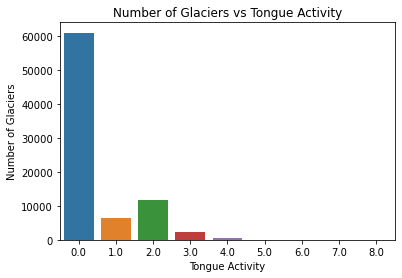

In [30]:
sns.barplot(data=data_2,x='tongue_activity',y='Country')
plt.ylabel('Number of Glaciers')
plt.xlabel('Tongue Activity')
plt.title('Number of Glaciers vs Tongue Activity')
plt.show()

Notes: Large percentage are not known Most are under a slight retreat, and almost none are growing

Tongue_Activity meaning:
* 0-uncertain
* 1-marked retreat
* 2-slight retreat
* 3-stationary
* 4-slight advance
* 5-marked advance
* 6-possible surge
* 7- known surge
* 8-oscillating

In [13]:
# round all of the latitude to a whole number
data_3 = data['lat'].apply(np.floor).reset_index()
data_3

,index,lat
0,0,34.0
1,1,35.0
2,2,35.0
3,3,35.0
4,4,35.0
...,...,...
81558,81558,39.0
81559,81559,39.0
81560,81560,38.0
81561,81561,-50.0


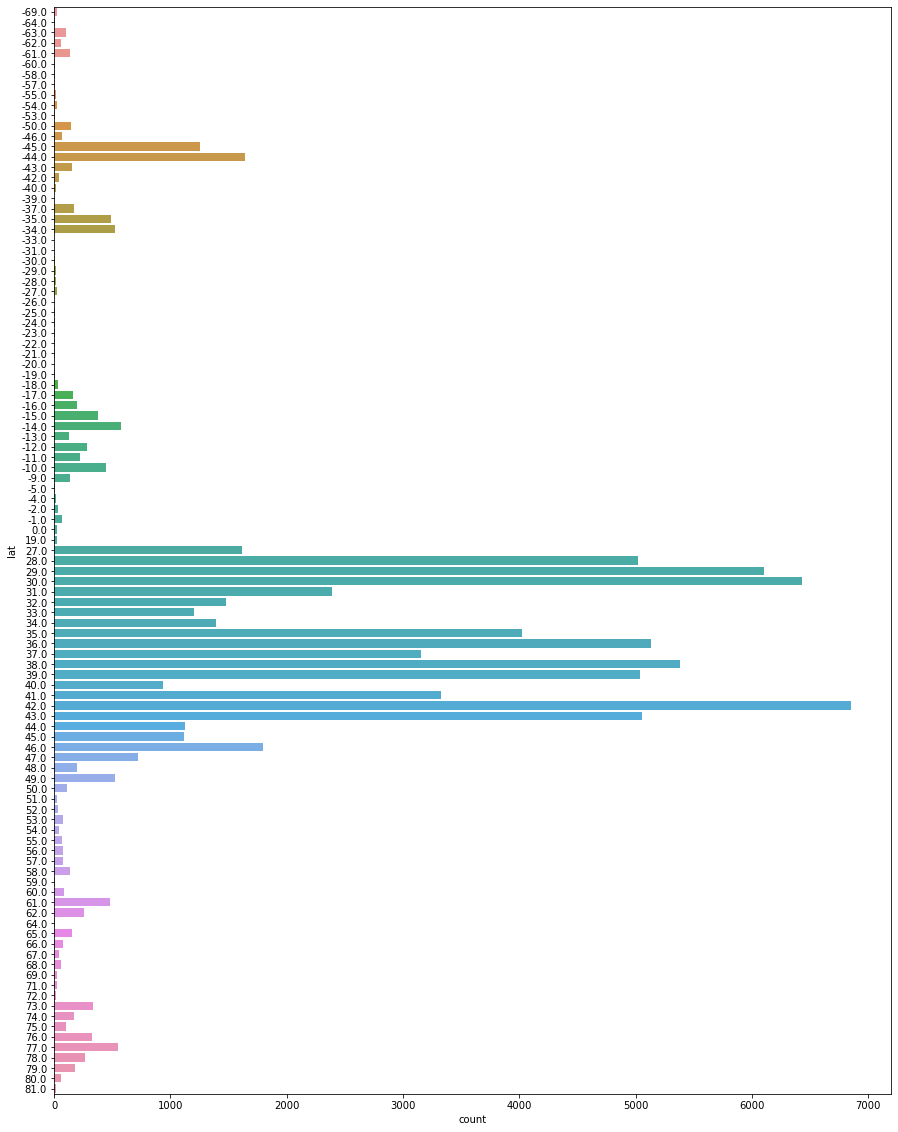

In [14]:
#number of glaciers at each givern latittude
plt.figure(figsize=(15, 20))
sns.countplot(data=data_3,y='lat')
plt.show()

Notes: most glaciers are between 27 and 50 degrees

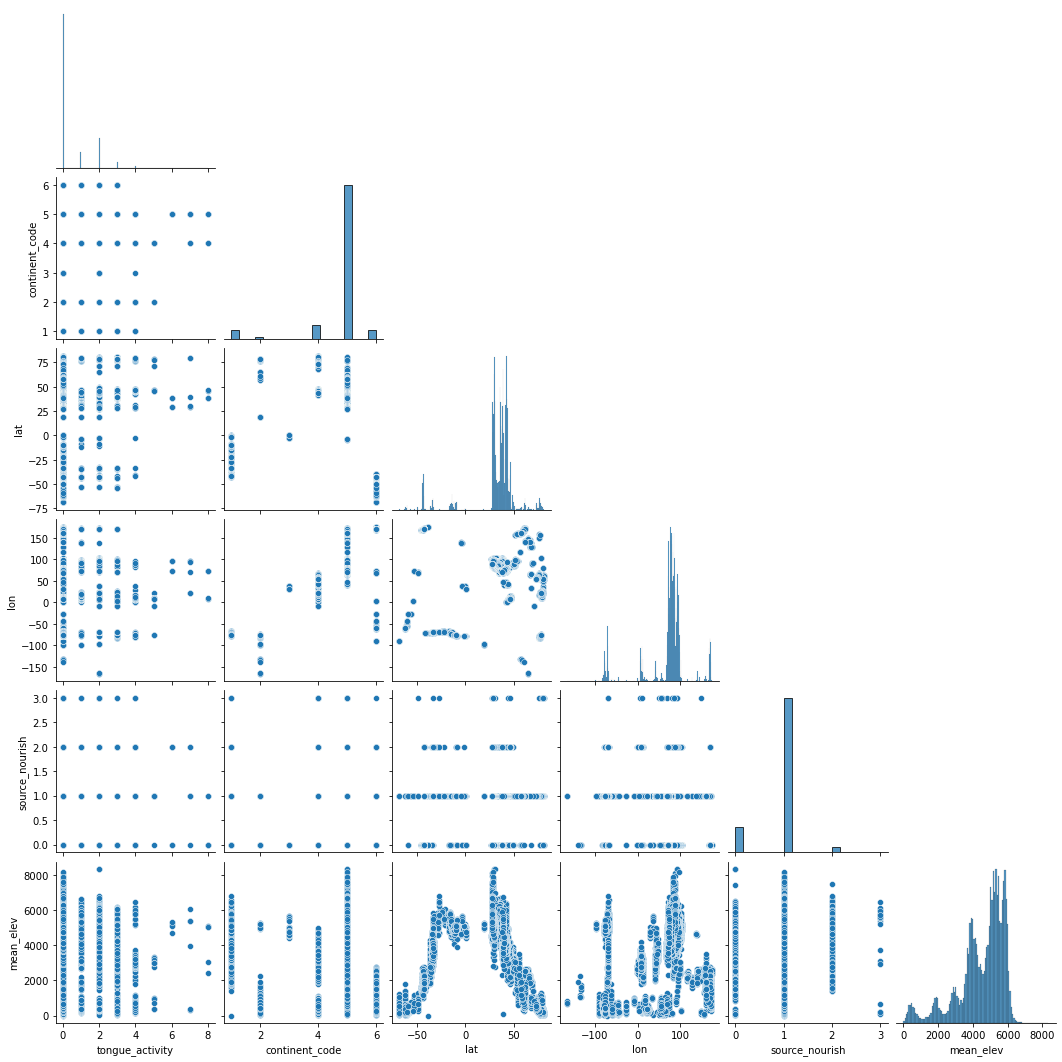

In [15]:
sns.pairplot(data=data,corner=True)

# Analysis (Task 5)

## Question: 
which countries have the most receeding glaciers in the world?


In [16]:
#filter down to receding glaciers only
data_q1 =  data.loc[:,['Country','tongue_activity']]
data_q1 = data_q1[data_q1['tongue_activity'] < 3]
data_q1 = data_q1[data_q1['tongue_activity'] != 0]
data1=data_q1.groupby('Country').tongue_activity.count().reset_index()

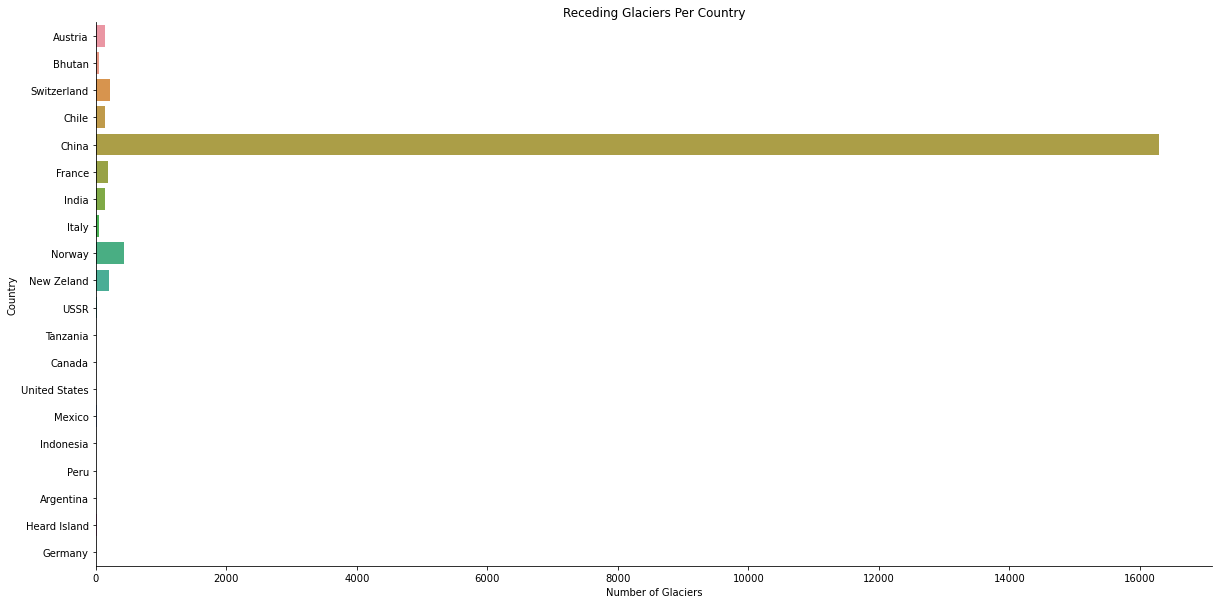

In [17]:
#number of receding glacier per country
plt.figure(figsize=(20, 10))
sns.countplot(data=data_q1,y='Country')
plt.xlabel('Number of Glaciers')
plt.title('Receding Glaciers Per Country')
sns.despine()
plt.show()

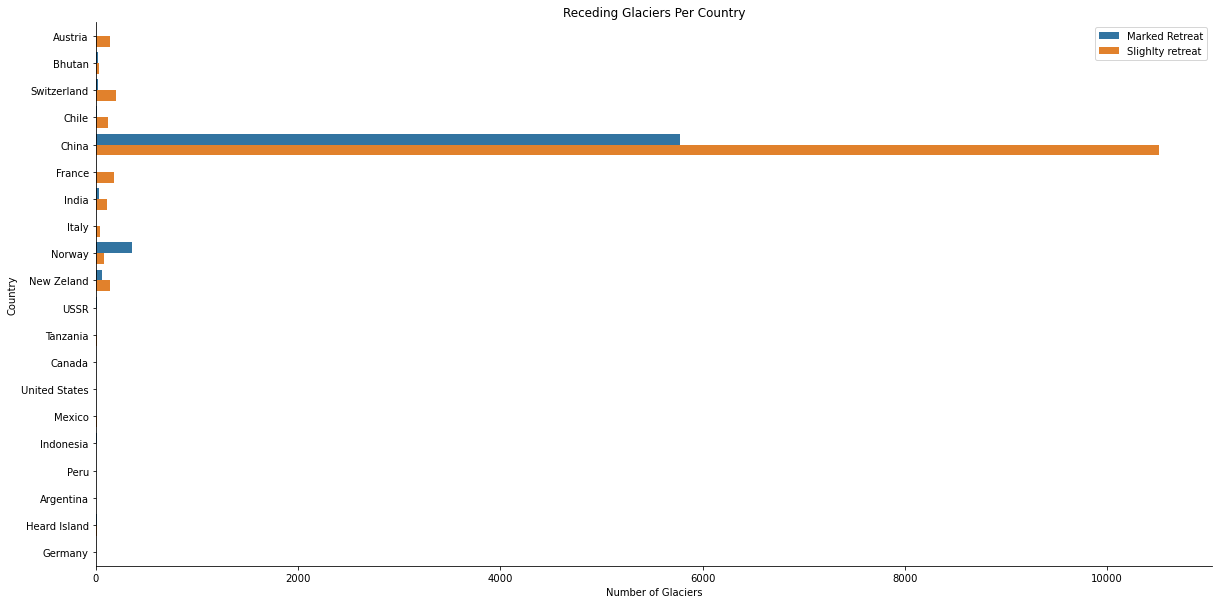

In [18]:
#plot number of glacier per country in slight and marked retreat
plt.figure(figsize=(20, 10))
sns.countplot(data=data_q1,y='Country',hue='tongue_activity')
plt.legend(['Marked Retreat','Slighlty retreat'])
plt.xlabel('Number of Glaciers')
plt.title('Receding Glaciers Per Country')
sns.despine()
plt.show()

### Observations
    Based off the above information it is clear that China has the most receding glaciers in the world by a large margin. Even when split up into different speed of receding they are ahead of everyone else by a significant margin.
    

## Question 2
Is there a relationship between elevation and what the activity of the glaciers tongue.

In [19]:
data

,tongue_activity,Glacier ID,Country,continent_code,lat,lon,orientation_acc,orientation_abl,source_nourish,mean_elev
0,0.0,AF5Q112B0009,Afghanistan,5,34.807,68.891,N,NW,0.0,3925.0
1,0.0,AF5Q112C0025,Afghanistan,5,35.438,69.552,S,S,0.0,4540.0
2,0.0,AF5Q112C0085,Afghanistan,5,35.869,70.224,SW,W,0.0,4700.0
3,0.0,AF5Q112C0146,Afghanistan,5,35.458,70.023,NW,NW,0.0,4113.0
4,0.0,AF5Q112C0151,Afghanistan,5,35.409,69.959,N,NE,0.0,4550.0
...,...,...,...,...,...,...,...,...,...,...
81558,0.0,SU5X14319082,USSR,5,39.520,73.720,NE,NE,1.0,4705.0
81559,0.0,SU5X14319100,USSR,5,39.600,73.930,N,N,1.0,4450.0
81560,0.0,SU5X14320018,USSR,5,38.030,71.470,E,E,1.0,4765.0
81561,0.0,TF6C40302026,French territ.,6,-49.471,68.993,S,S,1.0,650.0


In [20]:
#filter down to relevant data, and replace continent codes with continents name
data_q2 = data.loc[:,['mean_elev','tongue_activity','continent_code']]
data_q2 = data_q2[data_q2['tongue_activity']!=0]
data_q2['continent_code'] = data_q2['continent_code'].replace([1,2,3,4,5,6,7],['South America','North America','Africa','Europe','Asia','New Zeland','Antarctica'])
data_q2

,mean_elev,tongue_activity,continent_code
30,3100.0,4.0,Europe
34,2780.0,2.0,Europe
38,2940.0,4.0,Europe
68,5130.0,1.0,Asia
69,4900.0,1.0,Asia
...,...,...,...
81403,4210.0,3.0,Asia
81404,4260.0,3.0,Asia
81405,3550.0,3.0,Asia
81406,2860.0,3.0,Asia


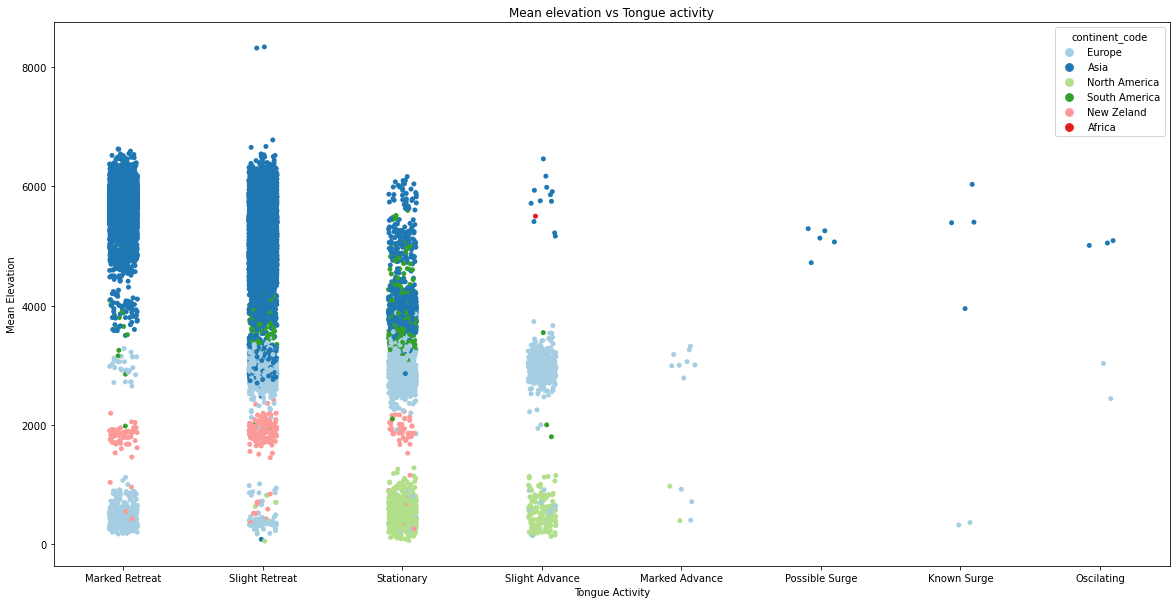

In [21]:
#distribution of mean elevation and tongue activity and continent
plt.figure(figsize=(20, 10))
sns.stripplot(data=data_q2,y='mean_elev',x='tongue_activity',hue='continent_code',palette='Paired')
plt.title('Mean elevation vs Tongue activity')
plt.xlabel('Tongue Activity')
plt.ylabel('Mean Elevation')
plt.xticks(ticks=np.arange(8),labels=['Marked Retreat','Slight Retreat','Stationary','Slight Advance','Marked Advance','Possible Surge','Known Surge','Oscilating'])
plt.show()

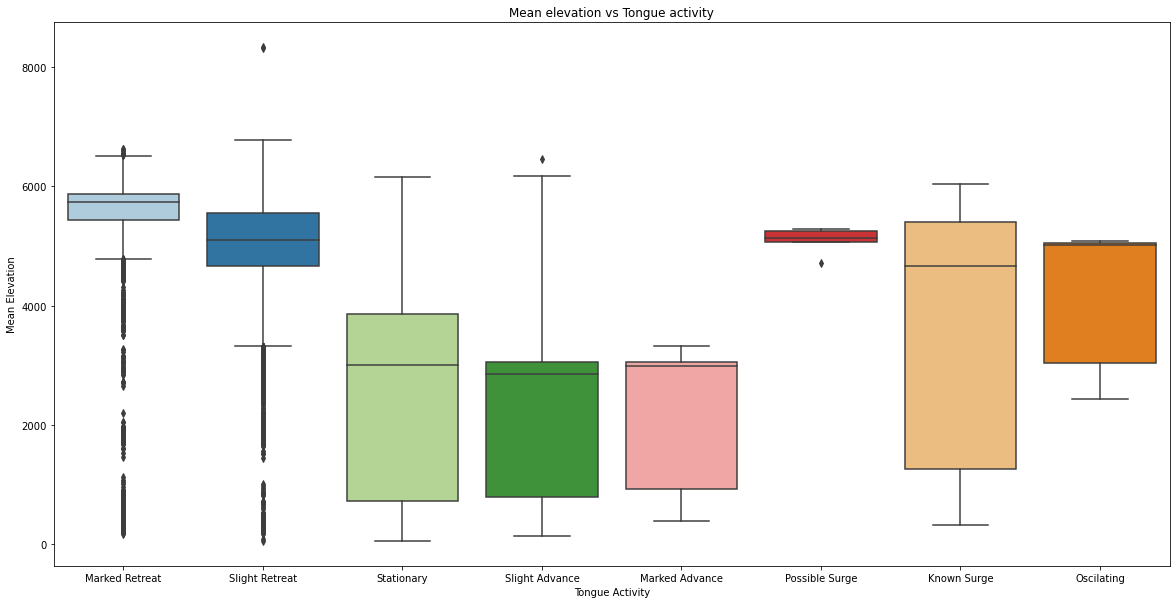

In [22]:
#Find relationship between tongue activity and elevation
plt.figure(figsize=(20, 10))
sns.boxplot(data=data_q2,y='mean_elev',x='tongue_activity',palette='Paired')
plt.title('Mean elevation vs Tongue activity')
plt.xlabel('Tongue Activity')
plt.ylabel('Mean Elevation')
plt.xticks(ticks=np.arange(8),labels=['Marked Retreat','Slight Retreat','Stationary','Slight Advance','Marked Advance','Possible Surge','Known Surge','Oscilating'])
plt.show()

### Observations
    Based off the above info the higher elevations (> 4000 m) seem to have the highest number of receding glaciers. The middle elevation seem to have more stationary and advancing glaciers and the surging glaciers a scattered throughout the elvevations.However these catigories contain significantly less glaciers than the receding catigories. So the relationship between elevation and tongue activity seem to be that higher elevation glaciers tend to be retreating moreoften than lower levation glaciers.
    

### Question 3
 Is there a relationship between latittude and the activity of the tongue?

In [23]:
#Filter colums down to country,tongue activity, lattitude
data_q3 = data.loc[:,['tongue_activity','lat','continent_code']]
data_q3=data_q3[data_q3['tongue_activity'] != 0]
data_q3['continent_code'] = data_q3['continent_code'].replace([1,2,3,4,5,6,7],['South America','North America','Africa','Europe','Asia','New Zeland','Antarctica'])
data_q3=data_q3.dropna(subset=['lat'])
data_q3


,tongue_activity,lat,continent_code
30,4.0,47.007,Europe
34,2.0,47.012,Europe
38,4.0,47.165,Europe
68,1.0,28.007,Asia
69,1.0,28.064,Asia
...,...,...,...
81403,3.0,39.570,Asia
81404,3.0,39.570,Asia
81405,3.0,39.020,Asia
81406,3.0,38.980,Asia


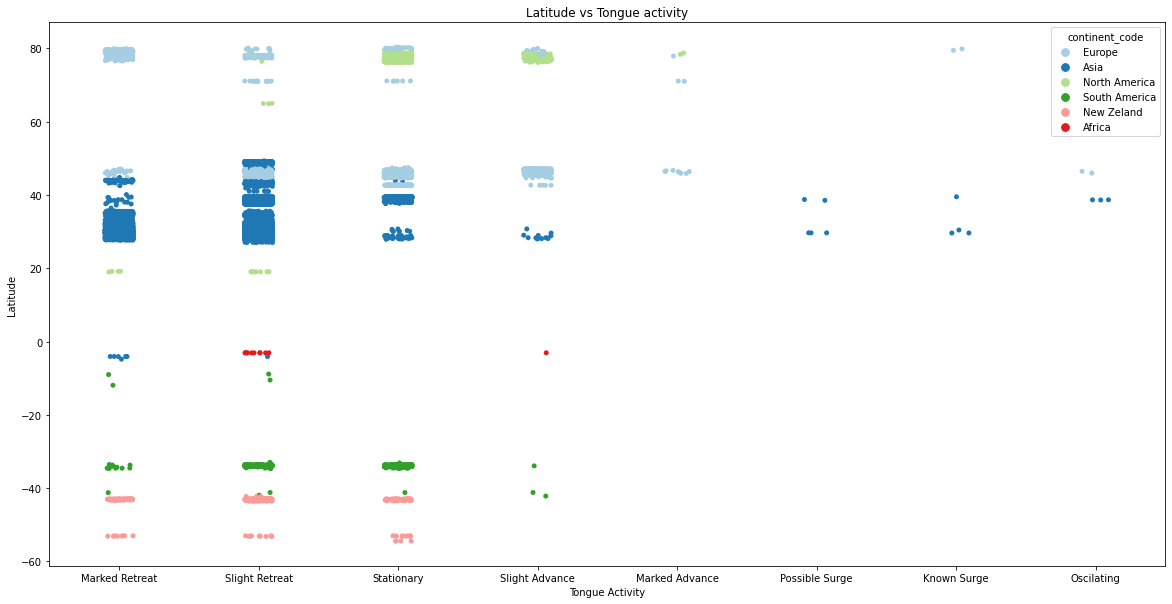

In [24]:
# relationship between boxplot and tongue activity, and what lattitude/country most glaciers are at
plt.figure(figsize=(20, 10))
sns.stripplot(data=data_q3,y='lat',x='tongue_activity',palette='Paired',hue='continent_code')
plt.title('Latitude vs Tongue activity')
plt.xlabel('Tongue Activity')
plt.ylabel('Latitude')
plt.xticks(ticks=np.arange(8),labels=['Marked Retreat','Slight Retreat','Stationary','Slight Advance','Marked Advance','Possible Surge','Known Surge','Oscilating'])
plt.show()

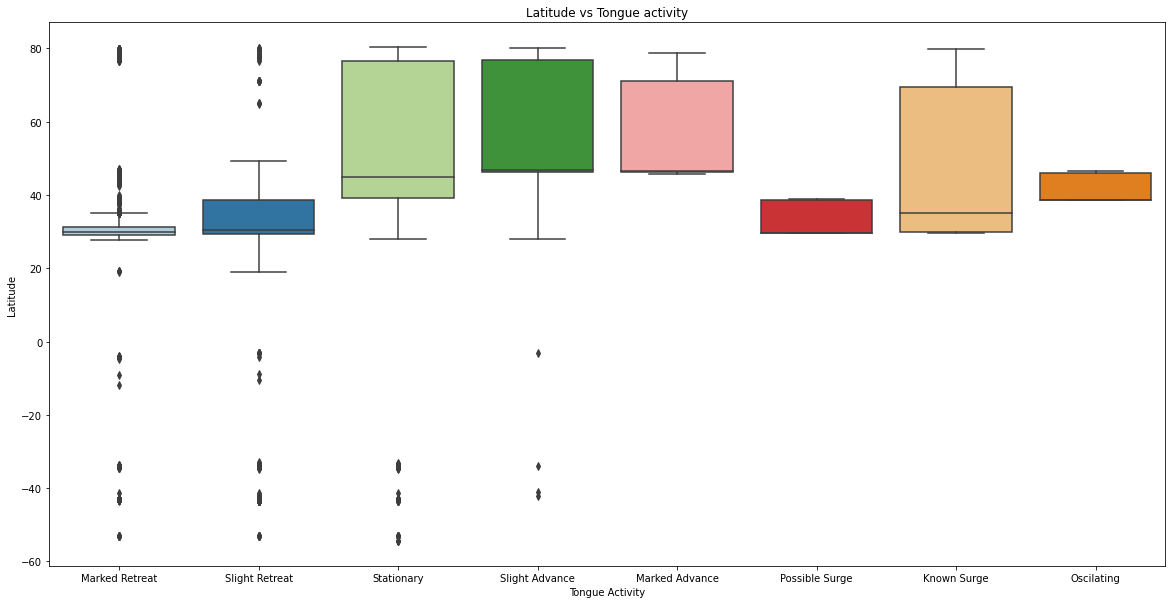

In [25]:
#find relationship between lat and tongue activity
plt.figure(figsize=(20, 10))
sns.boxplot(data=data_q3,y='lat',x='tongue_activity',palette='Paired')
plt.title('Latitude vs Tongue activity')
plt.xlabel('Tongue Activity')
plt.ylabel('Latitude')
plt.xticks(ticks=np.arange(8),labels=['Marked Retreat','Slight Retreat','Stationary','Slight Advance','Marked Advance','Possible Surge','Known Surge','Oscilating'])
plt.show()

### Observations
    A majority of the retreating glaciers are located in the northern hemisphere with larger latitudes and there are fewer located in the further south hemishphere. Same goes for advancing glacier, mostly in the far northern regions, but with a few in the far southern region. Both of these categories have almost none in the middle latitudes. Based of the information above, it appears that the only relationship between latitude related to latitude is that there are more gglaciers in the northern hemisphere. I suspect the tongue activity of a glacier will be dependant on more local factors such as elevation and how the glacier is fed.